# Silicon Calibration

In [210]:
# Fix RC overwriting
%config InlineBackend.rc = {}

import pickle
from pathlib import Path

import awkward as ak
import numpy as np
from matplotlib import pyplot as plt
from mplhep.styles import ROOT
from texat.utils.awkward.convert import from_hdf5

plt.style.use(ROOT)
plt.rc("figure", figsize=(10, 5), dpi=120)
data_path = pathlib.Path("data")

## Semiconductor Detectors
The silicon detectors that surround the TexAT TPC are used to measure the energy of light products that escape the active volume. Within each detector, the periodic structure of the semiconductor's crystalline lattice establishes a set of electron energy bands separated by ranges of forbidden energies. At the Fermi level, the lower energy (_valence_) band comprises a continuum of fully occupied states that are bound to particular lattice sites, whilst the higher energy (_conduction_) band contains entirely unfilled states in which the electrons are free to move throughout the lattice (see {numref}`conduction-valence-band`). 

:::{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Semiconductor_band_structure_%28lots_of_bands_2%29.svg/640px-Semiconductor_band_structure_%28lots_of_bands_2%29.svg.png
---
name: conduction-valence-band
alt: An illustration of the valence and conduction bands in a semiconductor. A dashed line at the Fermi energy indicates the boundary between the lower energy (filled) valence band and the higher energy (unfilled) conduction band.
width: 400px
align: center
---
An illustration of the band structure in a semiconductor. The dashed line indicates the Fermi level that separates the valence and conduction bands.

% https://commons.wikimedia.org/wiki/File:Semiconductor_band_structure_(lots_of_bands_2).svg
:::

The excitation of an electron across the gap between the valence and conduction bands establises an electron-hole pair, which is free to migrate throughout the lattice. It is the motion of these charge-pairs under an electric field that gives rise to a current. Above 0 K there will exist some steady-state concentration (given by the Boltzmann distribution) of thermal electrons in the conduction band such that the material will be conductive.  

In order to observe the charge-pairs produced by ionisation, there must exist an electric field such that the charge-carriers do not recombine, but rather induce a current through their motion. As any externally developed potential will induce an opposing potential in the material, it follows that this field must be established through intrinsic diffusion of the charge carriers. To this end, one can _dope_ the semiconductor lattice with substitutional impurities that introduce a surplus of a particular charge carrier. These dopant atoms do not conserve the electron-hole equilibrium, i.e. they introduce a majority of the singular charge carrier that exclusively determines the material's electric conductivity. Semiconductors doped with donor (electron) impurities are denoted N-type semiconductors (see {numref}`n-type-doping`), whilst those with acceptor impurities are termed P-type materials (see {numref}`p-type-doping`). 


:::{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/8/8b/N-Type_Semiconductor_Bands.svg/320px-N-Type_Semiconductor_Bands.svg.png 
---
name: n-type-doping
alt: A schematic diagram of the minority-majority charge carriers in an n-type semiconductor. A surplus of negative charge carriers (electron) can be seen in the conduction band.
width: 250px
align: center
figclass: margin
---
A schematic diagram of the minority-majority charge carriers in an n-type semiconductor. A surplus of negative charge carriers (electron) can be seen in the conduction band.
:::

:::{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/P-Type_Semiconductor_Bands.svg/320px-P-Type_Semiconductor_Bands.svg.png
---
name: p-type-doping
alt: A schematic diagram of the minority-majority charge carriers in an p-type semiconductor. A surplus of positive charge carriers (holes) can be seen in the conduction band.
width: 250px
align: center
figclass: margin
---
A schematic diagram of the minority-majority charge carriers in an p-type semiconductor. A surplus of positive charge carriers (holes) can be seen in the conduction band.
:::

Upon interfacing two alternately doped semiconductors, a P-N junction is formed. An initial gradient in the concentration of charge carriers leads to the establishment of a "depletion zone" in which electrons and holes combine, filling the valence band. This displacement of the majority charge carriers in turn establishes an electric field that inhibits further diffusion (see {numref}`p-n-junction`). These two phenomena render the depletion zone an ideal region for radiation detection; the electron-hole pairs formed by ionisation will quickly move under the electric field to establish a measurable current. 

The _contact potential_ established by the space charge at either end of the junction is of the order $\sim 1\,V$, which yields a poor electron-hole mobility. An electric potential can be applied to either side of the junction, widening the depletion region and reducing the likelihood of charge-pair recombination. Known as reverse biasing, this significantly improves the detector performance.

:::{figure} https://upload.wikimedia.org/wikipedia/commons/f/fa/Pn-junction-equilibrium-graphs.png
---
name: p-n-junction
alt: A schematic diagram of the charge-carrier distribution across a P-N junction. The holes in the P-type region and electrons in the N-type region are shown to reduce in concentration towards their counterparts. The space charge potential due to net charge carrier diffusion is shown to be maximal at the junction interface, and tending to zero outside of a given thickness.
width: 800px
align: center
---
A schematic diagram of the charge-carrier distribution across a P-N junction. Additional graphs show the charge, field, and electric potential, across the junction.
:::


%s the number of charge pairs produced by ionisation is proportional to the deposited energy, it is the time integral of the measured current that 
%In each region, a surplus of mobile charge carries is introduced through substitutional impurities, which serve to modify the 
% - [x] The periodic lattice of crystalline materials establishes allowed energy bands for electrons that exist within that solid.
% - [x] valence band, corresponds to those outer-shell electrons that are bound to specific lattice sites within the crystal
% ~~unlike metals, The number of electrons within the crystal is just adequate to fill completely all available sites within the valence band.~~
% ~~conduction in metals doesn't generate holes in valence band, just moves around (unlike semiconductor)~~
% donor impurities introduce loosely bound charge. Doesn't create hole, as only loosely bound? Maybe hole doesn't migrate because so sparsely distributed within material - long range interaction instead of short-range neighbours?
% mostly liberated by thermal conduction excitation
% in intrinsic semiconductor, holes & pairs only from thermal ex, so ni=pi
% p type have holes (vacancies) close to valence band - thermal ex from valence band fills vacancies, leaving holes in valence band
% Deposition of energy within these detectors leads to the formation of electron-hole charge-carriers that are excited to the conduction band of the material. The motion of these charge-carriers in an applied electric field gives rise to a current, whose time integral is approximately proportional to the deposited energy. 
% natural "contact" potential arises even though doped materials have net 0 charge . Need rev biasing to fully collect charges
% depletion region introduces net charge imbalance & removes charge carriers
% contact potential ~< band gap, arises due to space charge effects
% rev bias widens depletion region

It is the time-integral of the current induced within the semiconductor that is proportional to the energy deposited within the material. In order to determine the constant of proportionality between the measured signal and the deposited energy, the detector must first be calibrated with a known source. 

For this experiment, a four-peak alpha source was suspended within the TexAT TPC chamber, which was held under vacuum. A list of constituent isotopes and their decay radiation is given in {numref}`calibration-sources`.

:::{list-table} Isotopes present in the four-α calibration source, and their α decay radiation.
:name: calibration-sources
:header-rows: 1

* - Isotope
  - Energy /keV
  - Intensity (%)
* - <sup>241</sup>Am
  - 5442.8
  - 13.1
* - 
  - 5485.6
  - 84.8
* - <sup>244</sup>Cm
  - 5762.6
  - 23.1
* - 
  - 5804.8
  - 76.9
* - <sup>239</sup>Pu
  - 5105.5
  - 11.9
* - 
  - 5144.3
  - 17.1
* - 
  - 5156.6
  - 70.8
* - <sup>148</sup>Gd
  - 3182.7
  - 100
:::

The waveforms recorded by the GET acquisition system were fit using the methods described in {ref}`signal-fitting`, and the corresponding charge accumulated in a histogram. The distribution for each detector is shown in {numref}`calibration-spectra`.    

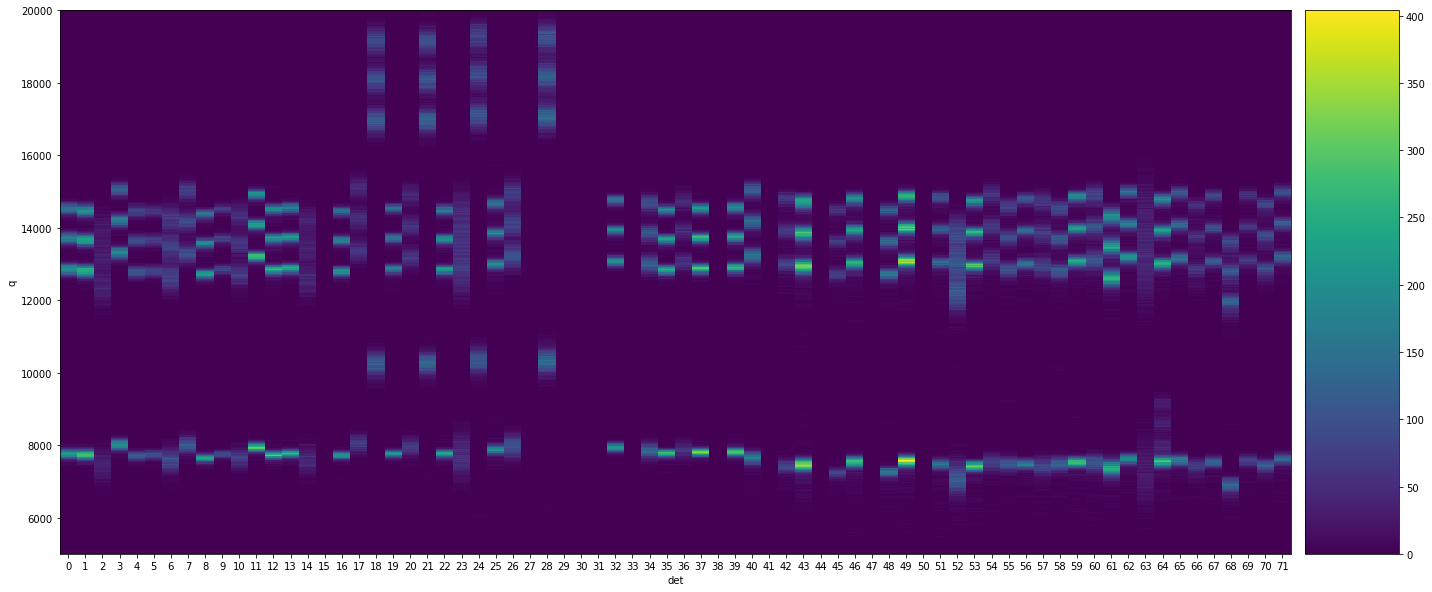

In [211]:
with open(data_path / "calibration-heatmap.pickle", "rb") as f:
    calibration_heatmap = pickle.load(f)[:, ::2j]

fig_heatmap = plt.figure(figsize=(24, 10))
ax = fig_heatmap.gca()
calibration_heatmap.plot2d(ax=ax);

Where charge-pair formation is not the primary mode of energy loss within the semiconductor, the number of created pairs is governed by Poisson counting statistics {math}`\operatorname{Var}(N)=N`. Meanwhile, in the limit that charge-pair formation is the singular energy-loss mechanism, the number of charge pairs is exactly determined by the deposited energy (ignoring the distribution on the ionisation energy), i.e. {math}`\operatorname{Var}(N)=0`. The ratio between the observed variance and its Poissonian expectation value is the Fano factor:{cite:ps}`subashiev_correlation_2010`
:::{math}
:label: fano-factor
F=\frac{\langle\delta N^2\rangle}{\langle N\rangle}\,,
:::
where {math}`\langle\delta N^2\rangle` is the observed variance and {math}`\langle N\rangle` the observed mean. In silicon detectors, which exhibit a high charge-pair formation efficiency, $F$ is experimentally found to be of the order $10^{-1}$.{cite:ps}`kotov_pair_2018`{cite:ps}`alig_scattering_1980`

:::{note}
Simplified "final-state" models can predict the experimental values for {math}`F` with a microscopic assuming a single-particle-distribution function. One such model, the "bathtub model", assumes no inter-charge-pair correlations and draws from this single-particle-distribution to partition the deposited energy. It has been shown that correlational effects are required to fully reproduce experimental measurements of $F$, through models such as the random parking problem (RPP){cite:ps}`subashiev_correlation_2010`
:::

% See also http://www.ee.sunysb.edu/~serge/235.pdf and https://arxiv.org/pdf/0911.1532.pdf
% each shot is random uncorrelated -> central limit theorem -> gaussian energy distribution
% correlation effects lead to increasing F close to true value (mainly NN effects)
% resolution vs efficiency - bigger detectors collect compton scattering, worse res

For each detector, the charge distribution was fit as a sum of four Gaussian distributed random variables.

:::{note}
The motivation for a Gaussian fit function follows from the application of the central-limit-theorem to the final-state model of charge-pair formation,{cite:ps}`subashiev_correlation_2010` yielding
```{math}
P(E_{N})=C_{N}\exp\left[-\frac{(E_{N}-N\epsilon)^{2}}{2N\langle\delta\epsilon^%
{2}\rangle}\right]~{}.
```
:::

In order to determine the set of initial fit parameters, a cumulative mass lookup was used to estimate the peak loci (see {numref}`calibration-charge-cmf`), and sensible values chosen for the peak width and scaling factor. 

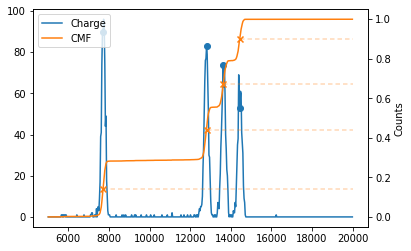

In [212]:
y = calibration_heatmap[5j, :].values()
charge = calibration_heatmap.axes[1].centers
charge_edge = calibration_heatmap.axes[1].edges

# CMF loci of peaks
cmf = np.cumsum(y) / np.sum(y)
peak_cmf = np.r_[0.14, 0.44, 0.67, 0.9]
i_peak = np.searchsorted(cmf, peak_cmf)

fig_cmf, ax = plt.subplots()
ax.scatter(charge[i_peak], y[i_peak], label="Peak", color="C0")
ax2 = ax.twinx()
lines = ax.plot(charge, y, label="Charge", color="C0") + ax2.plot(
    charge, cmf, label="CMF", color="C1"
)
ax2.scatter(charge[i_peak], peak_cmf, marker="x", color="C1")
ax2.hlines(
    peak_cmf,
    charge[i_peak],
    charge_edge[-1],
    linestyle=(0, (3, 2)),
    color="C1",
    alpha=0.3,
)
plt.legend(handles=lines)
plt.xlabel("Charge")
plt.ylabel("Counts");

This method of localising the decay peaks from the calibration source is robust in the face of varying detector noise. 

## Calibration
Following the peak fitting process, a linear regression was then performed against the known energies given in {numref}`calibration-sources` to obtain a set of calibration coefficients for each detector. A superposition of the calibrated charge distributions can be seen in {numref}`calibrated-distributions`.

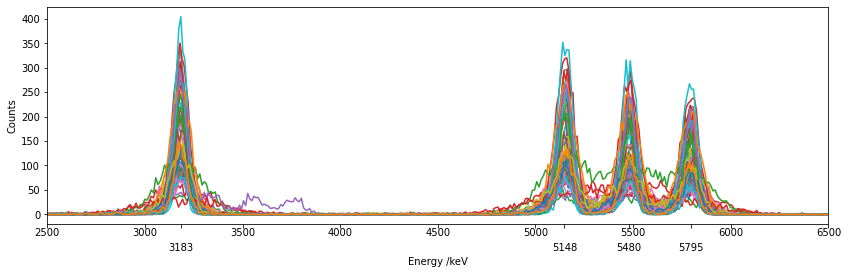

In [213]:
calibration = ak.Array(
    [
        [[5442.80, 13.1], [5485.56, 84.8]],  # Am
        [[5762.64, 23.10], [5804.77, 76.90]],  # Cm
        [[5105.5, 11.94], [5144.3, 17.11], [5156.59, 70.77]],  # Pu
        [[3182.690, 100]],  # Gd
    ]
)

source_energy = ak.to_numpy(
    np.sort(
        np.sum(calibration[..., 1] * calibration[..., 0], axis=1)
        / np.sum(calibration[..., 1], axis=1)
    )
)
coeff = from_hdf5(data_path / "calibration.h5").coefficient

fig_combined, ax = plt.subplots(figsize=(14, 4))
ax.plot(
    coeff[:, 1] * charge[:, np.newaxis] + coeff[:, 0],
    np.transpose(calibration_heatmap.values()),
)
ax.set_xlabel("Energy /keV")
ax.set_ylabel("Counts")
ax.set_xlim(2500, 6500)

ticks = np.c_[
    np.r_[xticks := np.linspace(2500, 6500, 9), source_energy],
    np.r_[np.zeros_like(xticks), np.full_like(source_energy, 15)],
]
ticks = ticks[np.lexsort(ticks[:, [1, 0]].T)]

for tick, pad in zip(ax.set_xticks(ticks[:, 0]), ticks[:, 1]):
    tick.set_pad(pad)

## Resolution

The energy resolution of a detector is a measure of its performance with respect to the resolution of fine detail in the deposited energy.

It is conventionally given as the dimensionless quantity
:::{math}
:label: resolution
R = \frac{\text{FWHM}}{E}\,,
:::
where $E$ is the mean, and $\text{FWHM}$ the full-width at half-maximum (FWHM) of the energy distribution. Given {eq}`fano-factor`, this expands to
:::{math}
:label: silicon-resolution-fano
R = 2\sqrt{\frac{2\ln{2}Fk}{E}}\,,
:::
where $F$ the Fano factor, and $k$ is the mean number of charge carriers liberated per unit energy deposited in the detector. Experimental measurements have found $k$ to be approximately 3.6 eV for alpha particles in silicon.{cite:ps}`kotov_pair_2018`{cite:ps}`scholze_mean_1998`{cite:ps}`alig_scattering_1980`.

Whilst the majority of the calibrated detectors were found to have a resolution of 70-120 keV at 3182.7 keV, it can be seen that some detectors exhibited clear signs of degraded resolution. The waveforms measured by these detectors were subsequently discarded.

<!-- :::{warning}
Is this resolution too poor given [^1]?
> (...) only one of 12 has lost the resolution below an acceptable level (75 keV).
[^1]: https://www.sciencedirect.com/science/article/pii/S0168900220300073
::: -->
